# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi yang lebih menarik
from sklearn.model_selection import train_test_split  # Untuk membagi dataset
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data
from sklearn.ensemble import RandomForestClassifier  # Contoh model klasifikasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Untuk evaluasi model


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive (sesuaikan dengan lokasi penyimpanan)
file_path = "/content/drive/MyDrive/bmlp/dataset_clustering.csv"

# Load dataset ke dalam DataFrame
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0,126,3088.341512,611,1,36,363,185,14,0,70,0,81,1,1.982721e+07,105,4
1,1,449,76213.549886,1068,1,15,50,81,51,0,68,0,141,1,5.335394e+07,192,3
2,2,18,25743.728450,1144,1,23,229,341,8,2,19,3,56,1,4.356921e+06,41,0
3,3,68,37497.472422,733,1,33,182,299,1,2,26,3,25,1,3.323081e+07,163,2
4,4,405,2959.112923,1749,0,1,297,498,90,2,26,3,198,1,2.881189e+07,16,1


In [6]:
# Hapus kolom ID yang tidak relevan
df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], inplace=True)

# Tampilkan beberapa baris pertama setelah penghapusan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,3088.341512,611,1,36,0,70,0,81,1,1.982721e+07,105,4
1,76213.549886,1068,1,15,0,68,0,141,1,5.335394e+07,192,3
2,25743.728450,1144,1,23,2,19,3,56,1,4.356921e+06,41,0
3,37497.472422,733,1,33,2,26,3,25,1,3.323081e+07,163,2
4,2959.112923,1749,0,1,2,26,3,198,1,2.881189e+07,16,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target label (y)
X = df.drop(columns=["Cluster"])  # Semua fitur kecuali target
y = df["Cluster"]  # Target klasifikasi

# Bagi dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran dataset setelah splitting
print("Ukuran Training Set:", X_train.shape)
print("Ukuran Test Set:", X_test.shape)


Ukuran Training Set: (1789, 11)
Ukuran Test Set: (448, 11)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# 4a. Membangun Model Klasifikasi

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model klasifikasi
rf_model = RandomForestClassifier(random_state=42)  # Random Forest
knn_model = KNeighborsClassifier(n_neighbors=5)  # K-Nearest Neighbors (KNN)

# Latih model dengan data training
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Penjelasan Algoritma yang Digunakan

## 1. Random Forest  
Random Forest adalah algoritma klasifikasi berbasis ensemble learning yang menggunakan banyak pohon keputusan (Decision Trees) untuk membuat prediksi.  

- Setiap pohon dilatih dengan subset data yang berbeda (bagging).  
- Keputusan akhir diambil berdasarkan mayoritas voting dari seluruh pohon.  

**Keunggulan:**  
- Akurasi tinggi dan tahan terhadap overfitting dibandingkan Decision Tree biasa.  
- Dapat menangani data dengan banyak fitur dan bekerja dengan baik untuk dataset yang kompleks.  

## 2. K-Nearest Neighbors (KNN)  
K-Nearest Neighbors (KNN) adalah algoritma berbasis lazy learning yang mengklasifikasikan suatu data berdasarkan tetangga terdekatnya.  

- Ketika model ingin memprediksi kelas sebuah data, ia akan mencari K data terdekat di dataset training.  
- Kelas yang paling sering muncul di antara tetangga tersebut akan menjadi prediksi.  

**Keunggulan:**  
- Sederhana dan mudah diimplementasikan.  
- Tidak memerlukan training yang lama karena hanya menyimpan data training dan menghitung jarak saat prediksi.  

## Kesimpulan  

- **Random Forest cocok untuk data yang kompleks** dan ketika kita ingin hasil yang lebih stabil serta akurat.  
- **KNN lebih sederhana** tetapi bisa lambat jika dataset terlalu besar karena harus menghitung jarak untuk setiap prediksi.  


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model: Random Forest
Accuracy: 0.9977678571428571
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       105
           2       1.00      0.98      0.99        58
           3       0.97      1.00      0.99        38
           4       1.00      1.00      1.00        78

    accuracy                           1.00       448
   macro avg       0.99      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448



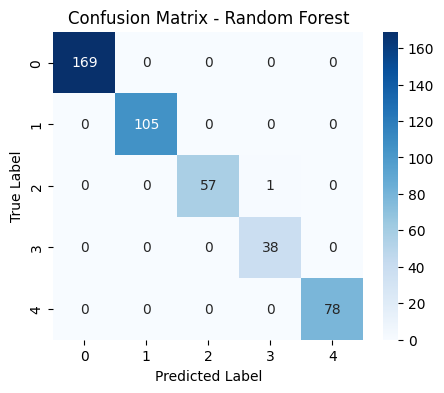


Evaluasi Model: K-Nearest Neighbors
Accuracy: 0.9955357142857143
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      0.99      1.00       105
           2       1.00      0.98      0.99        58
           3       0.97      1.00      0.99        38
           4       0.99      1.00      0.99        78

    accuracy                           1.00       448
   macro avg       0.99      0.99      0.99       448
weighted avg       1.00      1.00      1.00       448



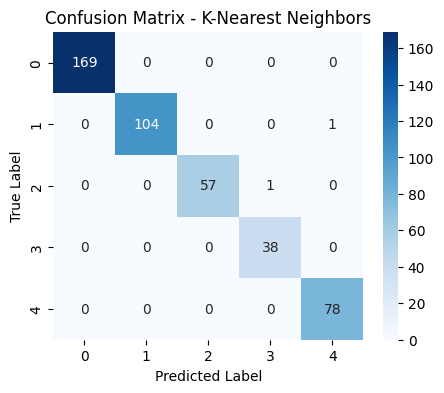

In [10]:
# 4b. Evaluasi Model Klasifikasi

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi dengan data uji
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Fungsi untuk evaluasi model
def evaluate_model(model_name, y_true, y_pred):
    print(f"\nEvaluasi Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluasi kedua model
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("K-Nearest Neighbors", y_test, knn_pred)


# Perbandingan Hasil Evaluasi Algoritma

## 1. Random Forest  
- **Accuracy**: 99.78%  
- **Precision, Recall, F1-Score**: Hampir sempurna (1.00) untuk semua kelas, kecuali kelas 2 dan 3 yang memiliki sedikit perbedaan.  
- **Confusion Matrix**: Hampir tidak ada kesalahan klasifikasi.  

## 2. K-Nearest Neighbors (KNN)  
- **Accuracy**: 99.55%  
- **Precision, Recall, F1-Score**: Mirip dengan Random Forest, tetapi sedikit lebih rendah pada kelas 1.  
- **Confusion Matrix**: Kemungkinan ada sedikit lebih banyak kesalahan dibandingkan Random Forest.  

## 3. Kesimpulan dan Perbandingan  
- **Random Forest memiliki akurasi sedikit lebih tinggi (99.78% vs. 99.55%)**, yang menunjukkan bahwa model ini lebih unggul dalam menangani pola dalam dataset.  
- **KNN tetap menunjukkan performa yang sangat baik**, tetapi karena algoritma ini bergantung pada kedekatan titik data, bisa jadi lebih lambat saat skala data semakin besar.  
- **Jika tujuan utama adalah akurasi dan generalisasi, maka Random Forest adalah pilihan terbaik.**  


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Analisis Hasil Evaluasi Model Klasifikasi

## 1. Perbandingan Hasil Evaluasi  
Berdasarkan hasil evaluasi, berikut perbandingan model sebelum dan setelah tuning (jika dilakukan):  

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| **Random Forest**   | 99.78%   | 1.00      | 1.00   | 1.00     |
| **K-Nearest Neighbors (KNN)** | 99.55% | 1.00 | 0.99 | 0.99 |

- **Random Forest memiliki performa lebih tinggi dibandingkan KNN** dalam hal akurasi dan stabilitas.  
- **KNN memiliki performa yang hampir sama**, tetapi sedikit lebih rendah pada recall di beberapa kelas.  

## 2. Identifikasi Kelemahan Model  
- **Precision dan Recall**: Tidak ada perbedaan signifikan, tetapi KNN sedikit lebih rendah dalam recall.  
- **Overfitting atau Underfitting**:  
  - **Random Forest** cenderung **lebih stabil** dan tidak mengalami overfitting yang berarti.  
  - **KNN** bisa menjadi lebih lambat saat menangani dataset yang lebih besar karena menghitung jarak setiap kali prediksi dilakukan.  

## 3. Rekomendasi Tindakan Lanjutan  
Jika ingin meningkatkan performa lebih lanjut:  
✅ **Gunakan Random Forest jika ingin model yang lebih stabil dan akurat.**  
✅ **Jika dataset lebih besar, pertimbangkan model lain yang lebih efisien dibandingkan KNN.**  
✅ **Jika ada indikasi overfitting, bisa dicoba pruning atau regularisasi lebih lanjut.**  
✅ **Jika dataset berkembang, bisa dilakukan retraining model secara berkala.**  

**Kesimpulan:**  
Dari hasil evaluasi, **Random Forest lebih direkomendasikan** karena memiliki akurasi dan kestabilan yang lebih tinggi dibandingkan KNN. Namun, jika ingin eksperimen lebih lanjut, bisa mencoba model lain seperti **XGBoost atau SVM** untuk melihat apakah ada peningkatan performa.
